In [54]:
#Importing all the necessary libraries

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
#Reading the csv file of training set and testing set into panda dataframe

training_set = pd.read_csv("train.csv")
testing_set = pd.read_csv("test.csv")

In [3]:
#Displaying first 6 rows of dataset

training_set.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Displaying summary of information of dataset

training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1238 non-null   int64  
 1   sex       1238 non-null   object 
 2   bmi       1238 non-null   float64
 3   children  1238 non-null   int64  
 4   smoker    1238 non-null   object 
 5   region    1238 non-null   object 
 6   charges   1238 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 67.8+ KB


In [5]:
#Displaying number of missing values(null) in dataset

training_set.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#Counting total number of sex feature values

training_set['sex'].value_counts()

male      625
female    613
Name: sex, dtype: int64

In [7]:
#Counting total number of smoker feature values

training_set['smoker'].value_counts()

no     990
yes    248
Name: smoker, dtype: int64

In [8]:
#Counting total number of region feature values

training_set['region'].value_counts()

southeast    339
northwest    303
northeast    300
southwest    296
Name: region, dtype: int64

/var/folders/_d/wct9p37n47l69pjtxw5tsxr80000gn/T/ipykernel_99283/3933292502.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_set['age'], kde=False)


<Axes: xlabel='age'>

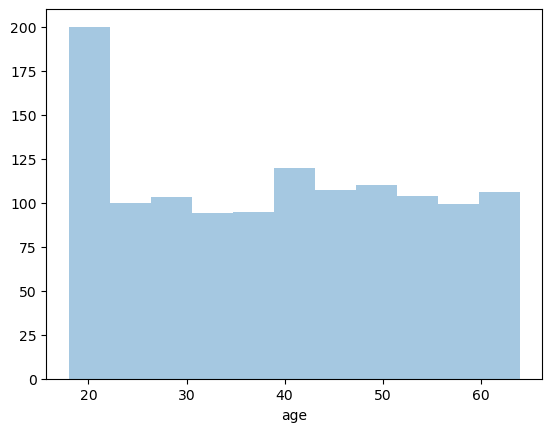

In [45]:
#Creating histogram for "age"

sns.distplot(training_set['age'], kde=False)

/var/folders/_d/wct9p37n47l69pjtxw5tsxr80000gn/T/ipykernel_99283/168589364.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_set['bmi'], kde=False)


<Axes: xlabel='bmi'>

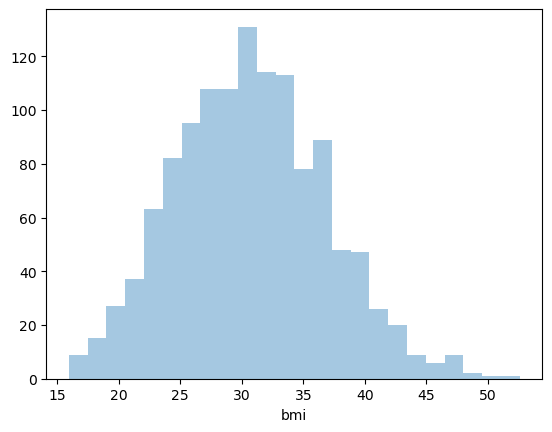

In [46]:
#Creating histogram for "bmi"

sns.distplot(training_set['bmi'], kde=False)

/var/folders/_d/wct9p37n47l69pjtxw5tsxr80000gn/T/ipykernel_99283/102587293.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_set['children'], kde=False)


<Axes: xlabel='children'>

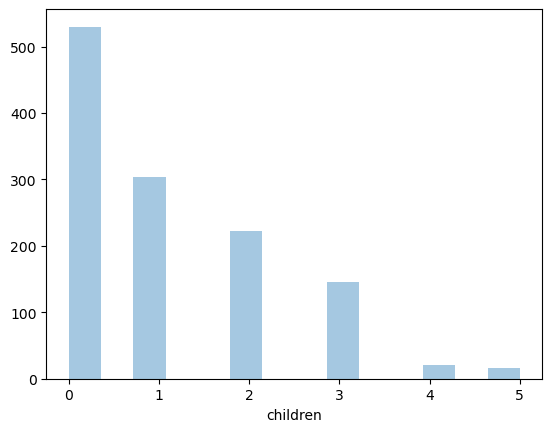

In [47]:
#Creating histogram for "children"

sns.distplot(training_set['children'], kde=False)

/var/folders/_d/wct9p37n47l69pjtxw5tsxr80000gn/T/ipykernel_99283/2109024727.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(training_set['charges'], kde=False)


<Axes: xlabel='charges'>

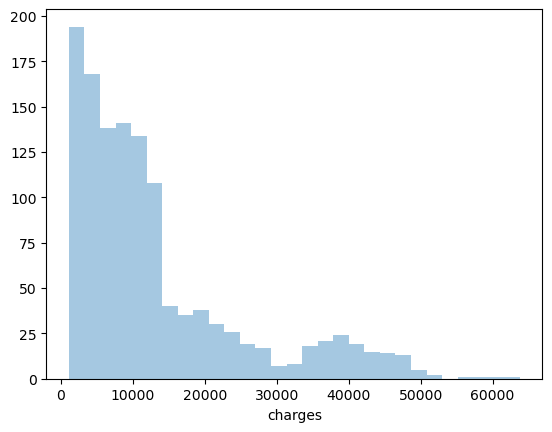

In [9]:
#Creating histogram for "charges"

sns.distplot(training_set['charges'], kde=False)

/var/folders/_d/wct9p37n47l69pjtxw5tsxr80000gn/T/ipykernel_99283/3030288354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_set.corr(), annot=True, cmap='coolwarm')


<Axes: >

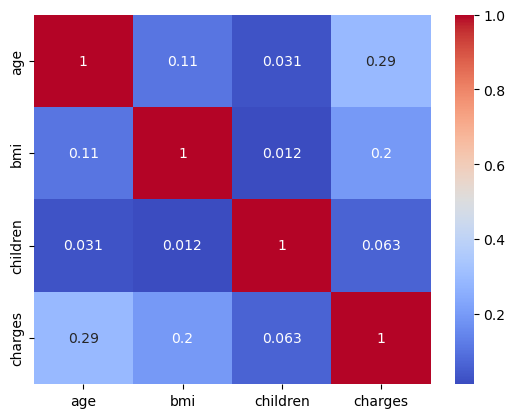

In [10]:
#Creating heatmap to observe correlation of variables

sns.heatmap(training_set.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='sex', ylabel='count'>

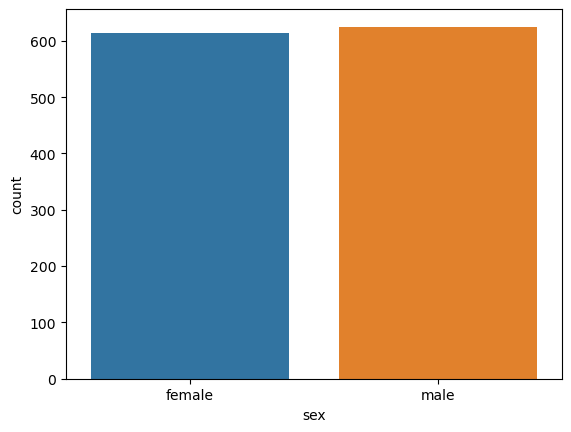

In [42]:
#Creating count plot for "sex"

sns.countplot(x='sex', data=training_set)

<Axes: xlabel='smoker', ylabel='count'>

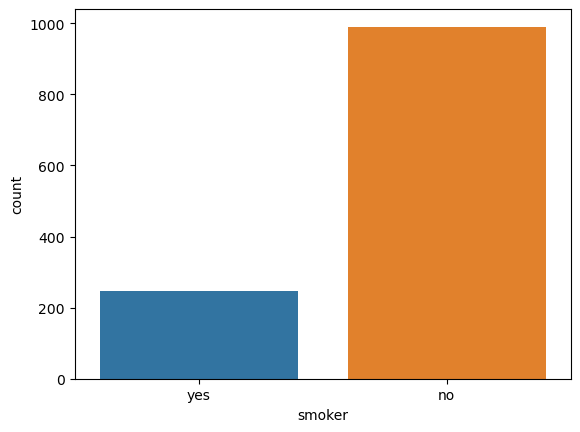

In [43]:
#Creating count plot for "smoker"

sns.countplot(x='smoker', data=training_set)

<Axes: xlabel='region', ylabel='count'>

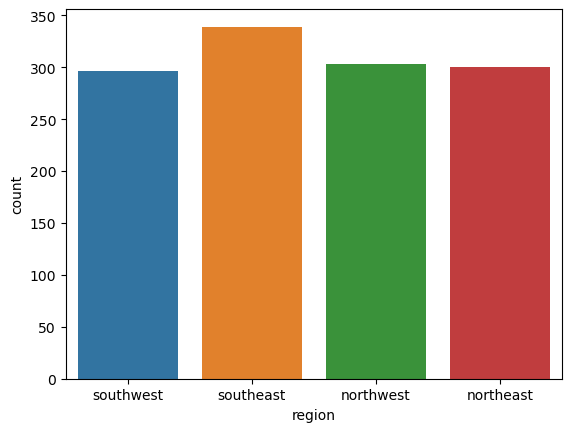

In [44]:
#Creating count plot for "region"

sns.countplot(x='region', data=training_set)

In [11]:
#Applied Label Encoding to categorical columns

label_encoder = LabelEncoder()
training_set['sex_encoded'] = label_encoder.fit_transform(training_set['sex'])
training_set['smoker_encoded'] = label_encoder.fit_transform(training_set['smoker'])
training_set['region_encoded'] = label_encoder.fit_transform(training_set['region'])

label_encoder = LabelEncoder()
testing_set['sex_encoded'] = label_encoder.fit_transform(testing_set['sex'])
testing_set['smoker_encoded'] = label_encoder.fit_transform(testing_set['smoker'])
testing_set['region_encoded'] = label_encoder.fit_transform(testing_set['region'])

# Display the DataFrame with encoded columns
print(training_set)
print(testing_set)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1233   58    male  23.300         0     no  southwest  11345.51900   
1234   45  female  27.830         2     no  southeast   8515.75870   
1235   26    male  31.065         0     no  northwest   2699.56835   
1236   63  female  21.660         0     no  northeast  14449.85440   
1237   58  female  28.215         0     no  northwest  12224.35085   

      sex_encoded  smoker_encoded  region_encoded  
0               0               1               3  
1               1               0               2  
2  

In [12]:
len(training_set)

1238

In [13]:
#Assigning independent and dependent variable from processed train dataset

independent_set = training_set.iloc[:,[0, 2, 3, 7, 8, 9]]
dependent_set = training_set.iloc[:, 6]

print(independent_set)
print(dependent_set)

      age     bmi  children  sex_encoded  smoker_encoded  region_encoded
0      19  27.900         0            0               1               3
1      18  33.770         1            1               0               2
2      28  33.000         3            1               0               2
3      33  22.705         0            1               0               1
4      32  28.880         0            1               0               1
...   ...     ...       ...          ...             ...             ...
1233   58  23.300         0            1               0               3
1234   45  27.830         2            0               0               2
1235   26  31.065         0            1               0               1
1236   63  21.660         0            0               0               0
1237   58  28.215         0            0               0               1

[1238 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520

In [14]:
#Assigning independent and dependent variable from processed test dataset

X_test = testing_set.iloc[:,[0, 2, 3, 7, 8, 9]]
y_test = testing_set.iloc[:, 6]

print(X_test)
print(y_test)

    age     bmi  children  sex_encoded  smoker_encoded  region_encoded
0    37  22.705         3            1               0               0
1    25  42.130         1            0               0               2
2    52  41.800         2            1               1               2
3    64  36.960         2            1               1               2
4    22  21.280         3            0               0               1
..  ...     ...       ...          ...             ...             ...
95   50  30.970         3            1               0               1
96   18  31.920         0            0               0               0
97   18  36.850         0            0               0               2
98   21  25.800         0            0               0               3
99   61  29.070         0            0               1               1

[100 rows x 6 columns]
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
95   NaN
96   NaN
97   NaN
98   NaN
99   NaN
Name: charges, Length: 10

In [65]:
#Using GradientBoostingRegressor to check how it performs using Kfold cross validation

kFold = KFold(n_splits=5, random_state=42, shuffle=True)

model_gradient = GradientBoostingRegressor()

#Initializing arrays to store the values
mse_scores = []
r2_scores = []

for trainSetIndex, testSetIndex in kFold.split(independent_set, dependent_set):
    X_train, X_val = independent_set.iloc[trainSetIndex], independent_set.iloc[testSetIndex]
    y_train, y_val = dependent_set.iloc[trainSetIndex], dependent_set.iloc[testSetIndex]
    
    #Train the model GradientBoostingRegressor
    model_gradient.fit(X_train, y_train)
    y_pred = model_gradient.predict(X_val)
    
    #Calculate mean square error
    mse_score = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse_score)
    
    #Calculate R-square score
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)
    
# Calculate and print the average MSE and R-squared scores
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

print("Average MSE: ", average_mse)
print("Average R-squared: ", average_r2)    

Average MSE:  22109332.097337876
Average R-squared:  0.8432497388303017


<Axes: >

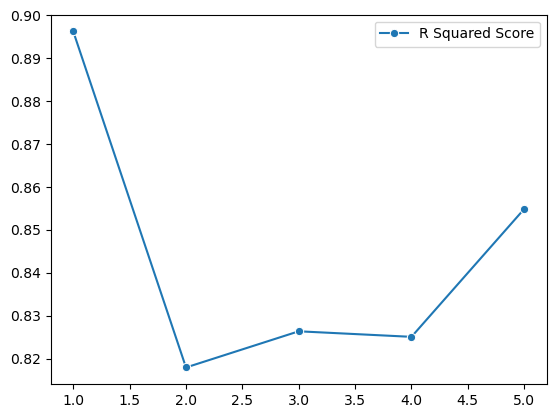

In [50]:
#Plot the R-sqaure for visualisation

sns.lineplot(x=range(1, len(r2_scores) + 1), y=r2_scores, marker='o',label='R Squared Score')

<Axes: >

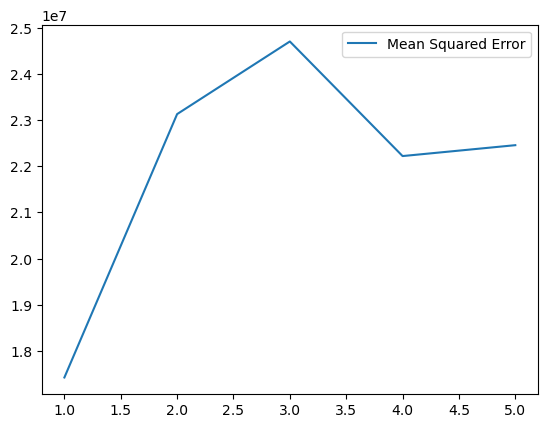

In [49]:
#Plot the MSE for visualisation

sns.lineplot(x=range(1, len(mse_scores)+1), y = mse_scores, markers='o', label='Mean Squared Error')

In [59]:
#Using Random Forest Regressor to check how it performs using Kfold cross validation

kFold = KFold(n_splits=5, random_state=42, shuffle=True)

model_random = RandomForestRegressor()

#Initializing arrays to store the values
mse_scores = []
r2_scores = []

for trainSetIndex, testSetIndex in kFold.split(independent_set, dependent_set):
    X_train, X_val = independent_set.iloc[trainSetIndex], independent_set.iloc[testSetIndex]
    y_train, y_val = dependent_set.iloc[trainSetIndex], dependent_set.iloc[testSetIndex]
    
    #Train the model RandomForestRegressor
    model_random.fit(X_train, y_train)
    y_pred = model_random.predict(X_val)
    
    #Calculating mean square error
    mse_score = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse_score)
    
    #Calculating r-square score
    r2 = r2_score(y_val, y_pred)
    r2_scores.append(r2)
    
# Calculate and print the average MSE and R-squared scores
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

print("Average MSE: ", average_mse)
print("Average R-squared: ", average_r2)  

Average MSE:  24718558.81199529
Average R-squared:  0.8245965852191747


<Axes: >

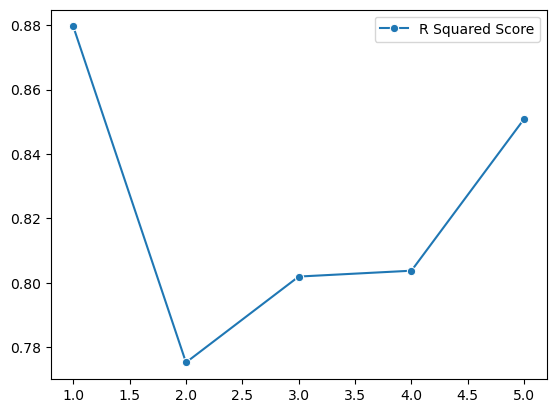

In [56]:
#Plotting lineplot for R squared score 
sns.lineplot(x=range(1, len(r2_scores) + 1), y=r2_scores, marker='o',label='R Squared Score')

<Axes: >

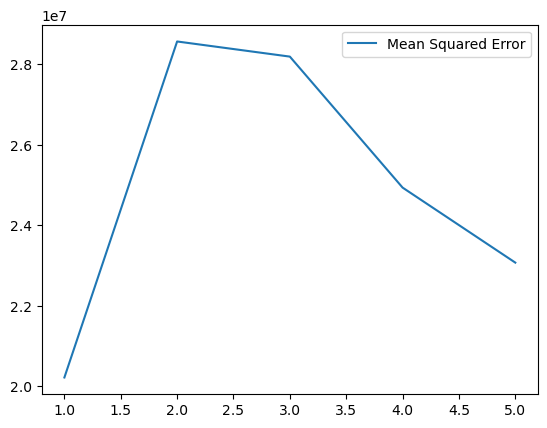

In [57]:
#Plotting lineplot for MSE
sns.lineplot(x=range(1, len(mse_scores)+1), y = mse_scores, markers='o', label='Mean Squared Error')

In [66]:
#Using test set to predict the model values

y_pred = model_gradient.predict(X_test)

In [67]:
#Initial price by Insurance company

initial_price = 16410282.7

#Total new price for all the employees predicted by model
final_total_price = initial_price + sum(y_pred)

In [72]:
print('Final total price for new 100 employees is : ', sum(y_pred))
print('Final total price for all the employees is : ', final_total_price)

Final total price for new 100 employees is :  1335334.093012557
Final total price for all the employees is :  17745616.793012556
